In [2]:
import netpixi
import graph_tool_extras as gte

In [3]:
g = gte.load('games.net.gz')

# Número total de vértices
n = g.num_vertices()

# Calcula degrees
total_deg = g.degree_property_map("total")
in_deg = g.degree_property_map("in")
out_deg = g.degree_property_map("out")

# Cria as centralidades normalizadas
from graph_tool import Graph

total_central = g.new_vertex_property("float")
in_central = g.new_vertex_property("float")
out_central = g.new_vertex_property("float")

for v in g.vertices():
    total_central[v] = total_deg[v] / (n - 1)
    in_central[v] = in_deg[v] / (n - 1)
    out_central[v] = out_deg[v] / (n - 1)

# Adiciona as centralidades ao grafo como propriedades
g.add_vp("central_total", total_central)
g.add_vp("central_in", in_central)
g.add_vp("central_out", out_central)

In [4]:
gte.save(g, 'degree.net.gz')

In [8]:
r = netpixi.render('degree.net.gz')

In [10]:
r.vertex_scale('central_total', 1, 500)

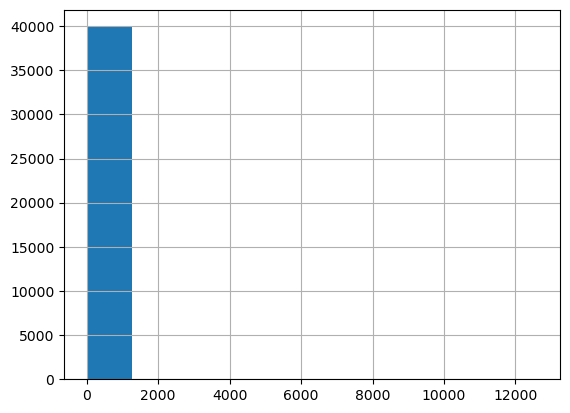

In [13]:
degrees = g.get_total_degrees()
degrees.hist();